<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/test-assignment-zoekabob/blob/main/Copy_of_DATA_301_Lab_2A_Zoe_Atkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [ ]:
df_shark = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_shark

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
df_shark['Corcoran'] = df_shark['Corcoran'].fillna(0)
df_shark['Cuban'] = df_shark['Cuban'].fillna(0)
df_shark['Greiner'] = df_shark['Greiner'].fillna(0)
df_shark['Herjavec'] = df_shark['Herjavec'].fillna(0)
df_shark['John'] = df_shark['John'].fillna(0)
df_shark["O'Leary"] = df_shark["O'Leary"].fillna(0)
df_shark['Harrington'] = df_shark['Harrington'].fillna(0)
df_shark['Guest'] = df_shark['Guest'].fillna(0)
df_shark.head(10)

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,1.0,2.0,A Perfect Pear,Yes,Food and Beverage,Female,"$500,000",50%,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
6,1.0,2.0,Classroom Jams,Yes,Children / Education,Male,"$250,000",10%,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN
7,1.0,2.0,Lifebelt,No,Consumer Products,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,1.0,2.0,Crooked Jaw,No,Fashion / Beauty,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,1.0,2.0,Sticky Note Holder,No,Lifestyle / Home,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:
df_shark['Amount'] = df_shark['Amount'].astype(str)

for i in range(len(df_shark['Amount'])):
  x = df_shark['Amount'].iloc[i]
  if x == "nan":
    num = 0.0
  else:
    x = x.replace("$","")
    x = x.replace(',','')
    num = float(x)
   
  df_shark['Amount'].iloc[i] = num 




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_shark['Equity'] = df_shark['Equity'].astype(str)
i=0
for x in df_shark['Equity']:
  num = x[:-1]
  if num == "na" or num == "" :
    dec = 0.0
  else:
    dec = float(num)
    dec = dec/100
  
  df_shark['Equity'].iloc[i] = dec
  i+=1

    # decimal = decimal/100
    # print(decimal)

# df_shark['Equity'].astype(float)
  
  
    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [ ]:
# for x in df_shark['Amount']:
#   print(x)
#   print(type(x))

In [ ]:
max = 0
for i in range(len(df_shark['Equity'])):
  equity = df_shark['Equity'].iloc[i]
  amount = df_shark['Amount'].iloc[i]

  if equity == 0:
    value = 0
  else:
    value = amount/equity
    if value > max:
      max = value
      index = i
  
# print(df_shark.Amount.max())
# df_shark.Amount.idxmax()
 
# print(df_shark.loc[df_shark.Amount.idxmax()])
idx = df_shark['Amount'].astype(float).idxmax()
print('\nMost Valuable Company:')
print(df_shark.loc[i])
print('Valued at: ', max)
print('\nCompany with the largest investment by a Shark:')
print(df_shark.loc[idx])
print('Valued at: ', df_shark.Amount.max())


Most Valuable Company:
Season                                6
No. in series                        29
Company                       Spikeball
Deal                                Yes
Industry               Fitness / Sports
Entrepreneur Gender                Male
Amount                           500000
Equity                              0.2
Corcoran                              0
Cuban                                 0
Greiner                               0
Herjavec                              0
John                                  1
O'Leary                               0
Harrington                            0
Guest                                 0
Details / Notes                     NaN
Name: 494, dtype: object
Valued at:  25000000.0

Company with the largest investment by a Shark:
Season                                                                 6
No. in series                                                         27
Company                                              

The most valuable company was Spikeball while the company with the largest investment was AirCar.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [49]:
colList = list(df_shark)
del colList[0:8]
del colList[-1]

colList
data = [0,0,0,0,0,0,0,0]
amountEachSer = pd.Series(data, colList)
amountEachSer

Corcoran      0
Cuban         0
Greiner       0
Herjavec      0
John          0
O'Leary       0
Harrington    0
Guest         0
dtype: int64

In [52]:
for row in df_shark.iterrows():
  if row[1][6] > 0:
    if row[1][colList].sum(axis=0) >0:
      howManyInvested = row[1][colList].sum(axis=0)
      amountInvestedEach = row[1][6]/row[1][colList].sum(axis=0)
      for x in row[1][colList].iteritems():
        if x[1] > 0: 
          sharkname = x[0]
          amountEachSer[sharkname]+=amountInvestedEach

amountEachSer

Corcoran       9825000
Cuban         35635000
Greiner       16340000
Herjavec      32595000
John          16308000
O'Leary       15905000
Harrington     1600000
Guest           800000
dtype: int64

Mark Cuban invested the most over the years. He invested a total of $35,635,000.


## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

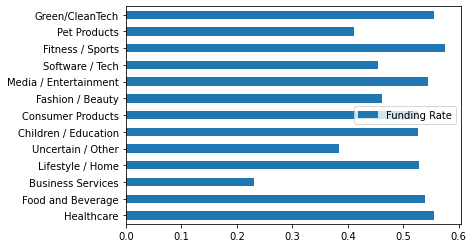

In [68]:
industries = df_shark['Industry'].unique()
data = [0]*len(industries)
investedYN = [0]*len(industries)

for row in df_shark.iterrows():
  i = 0
  for x in industries:
    if row[1][4] == x:
      data[i] +=1
      if row[1][6]>0:
        investedYN[i] +=1 
    i+=1
# print(industries)
# print(data)
# print(investedYN)

proportion = [0]*len(industries)
for i in range(len(industries)):
  proportion[i] = investedYN[i]/data[i]

# proportion


df = pd.DataFrame({'Funding Rate': proportion}, index=industries)
ax = df.plot.barh(rot=0)

The top industries the sharks funded were Fitness/Sports, Healthcare, and Green/CleanTech.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.